### Census Income

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")


In [73]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [74]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


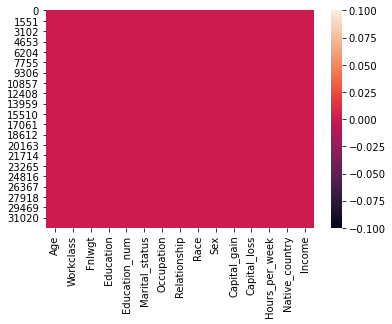

In [75]:
sns.heatmap(data.isnull())

In [76]:
#no null values

In [77]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


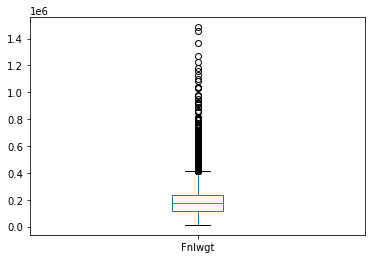

In [79]:
data.Fnlwgt.plot(kind="box")

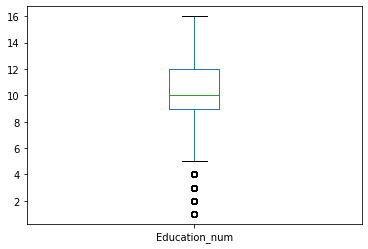

In [80]:
data.Education_num.plot(kind="box")

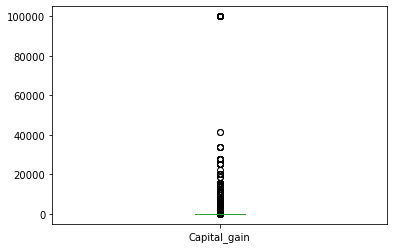

In [81]:
data.Capital_gain.plot(kind="box")

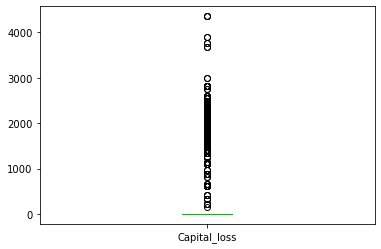

In [82]:
data.Capital_loss.plot(kind="box")

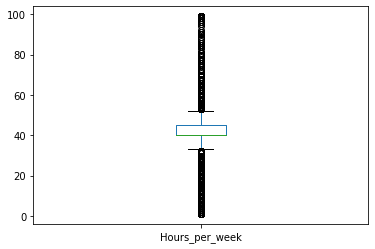

In [83]:
data.Hours_per_week.plot(kind="box")

In [84]:
#There are ouliers in all numeric columns

In [85]:
data.Capital_loss.nunique()

92

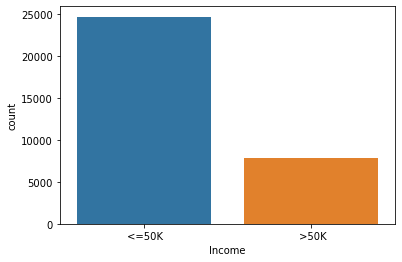

In [86]:

sns.countplot(x='Income', data=data )

In [87]:
#lesser entropy

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

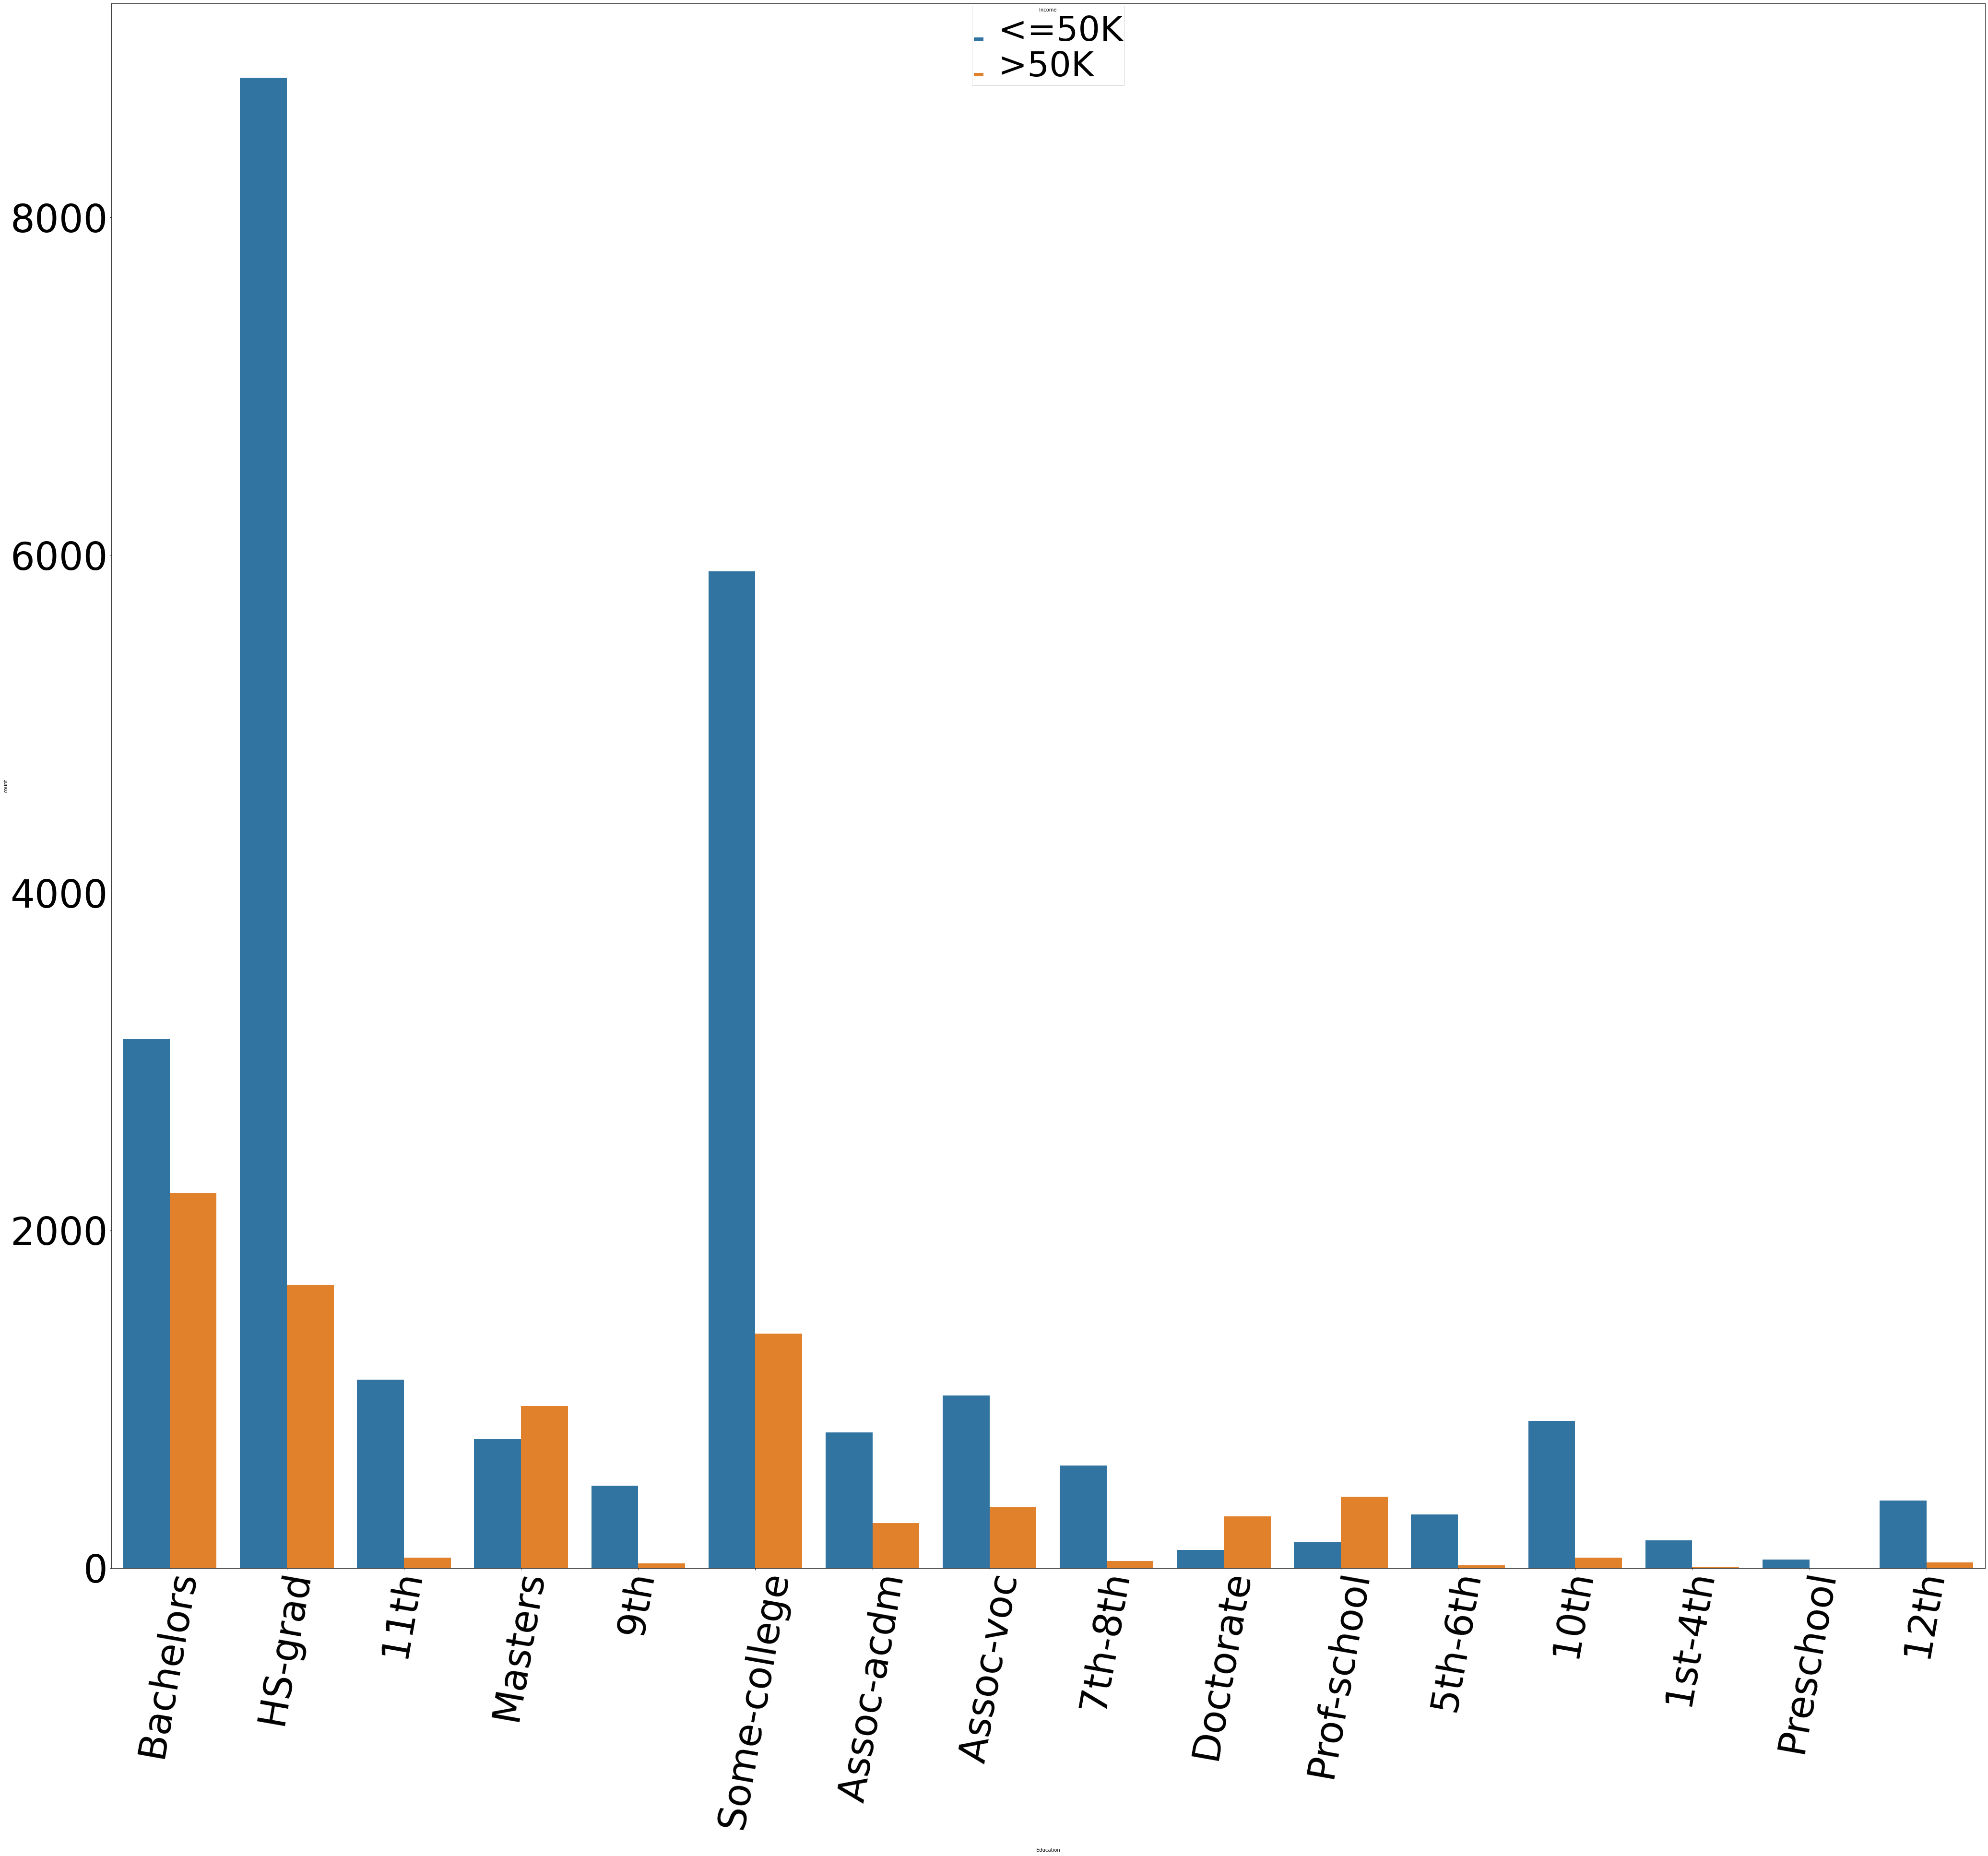

In [88]:
 plt.figure(figsize=(70,60))
chart = sns.countplot(x='Education', hue='Income', data=data )
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)


In [89]:
# Who studies bachelors has more chance to get income above 50k
#Hs grad has more chance to get income less than 50k

[Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

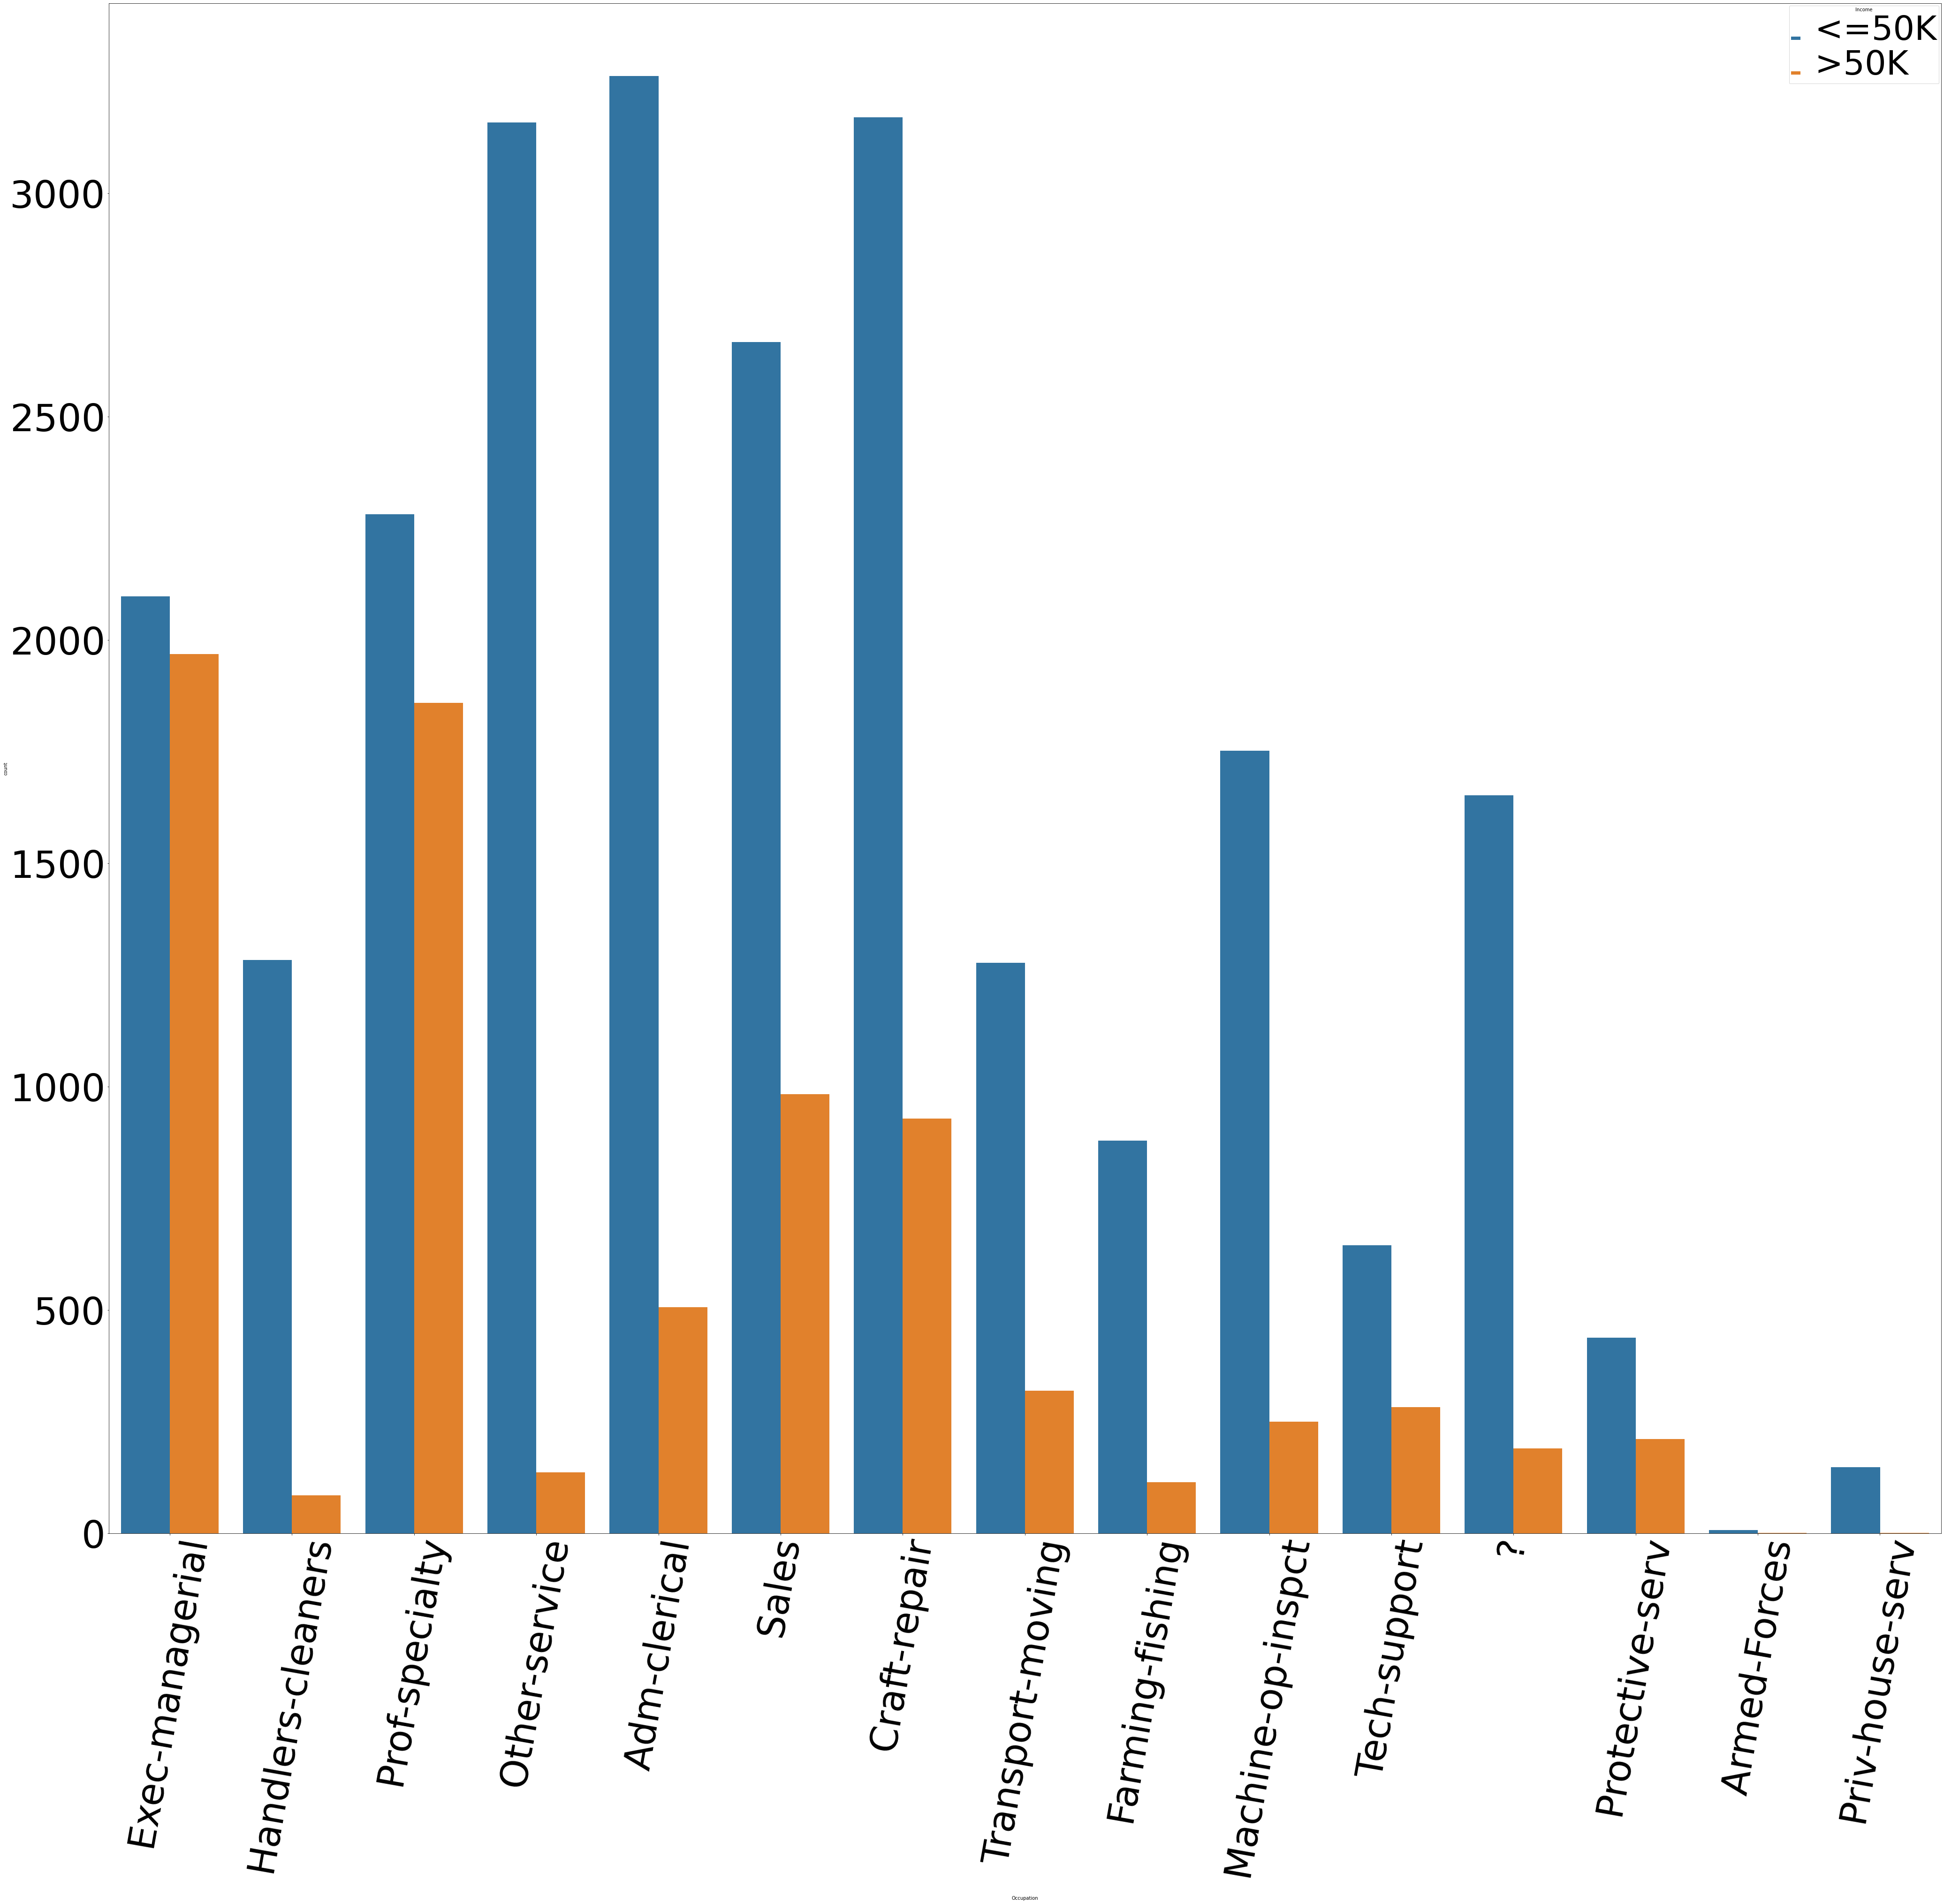

In [90]:
plt.figure(figsize=(70,60))
chart = sns.countplot(x='Occupation', hue='Income', data=data, )
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

In [91]:
#by occupation there is more chance to get less than 50k for adm-clerical and craft repair
#prof.speciality and Exec mangerial have a chance to get more than 50k

[Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' State-gov'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

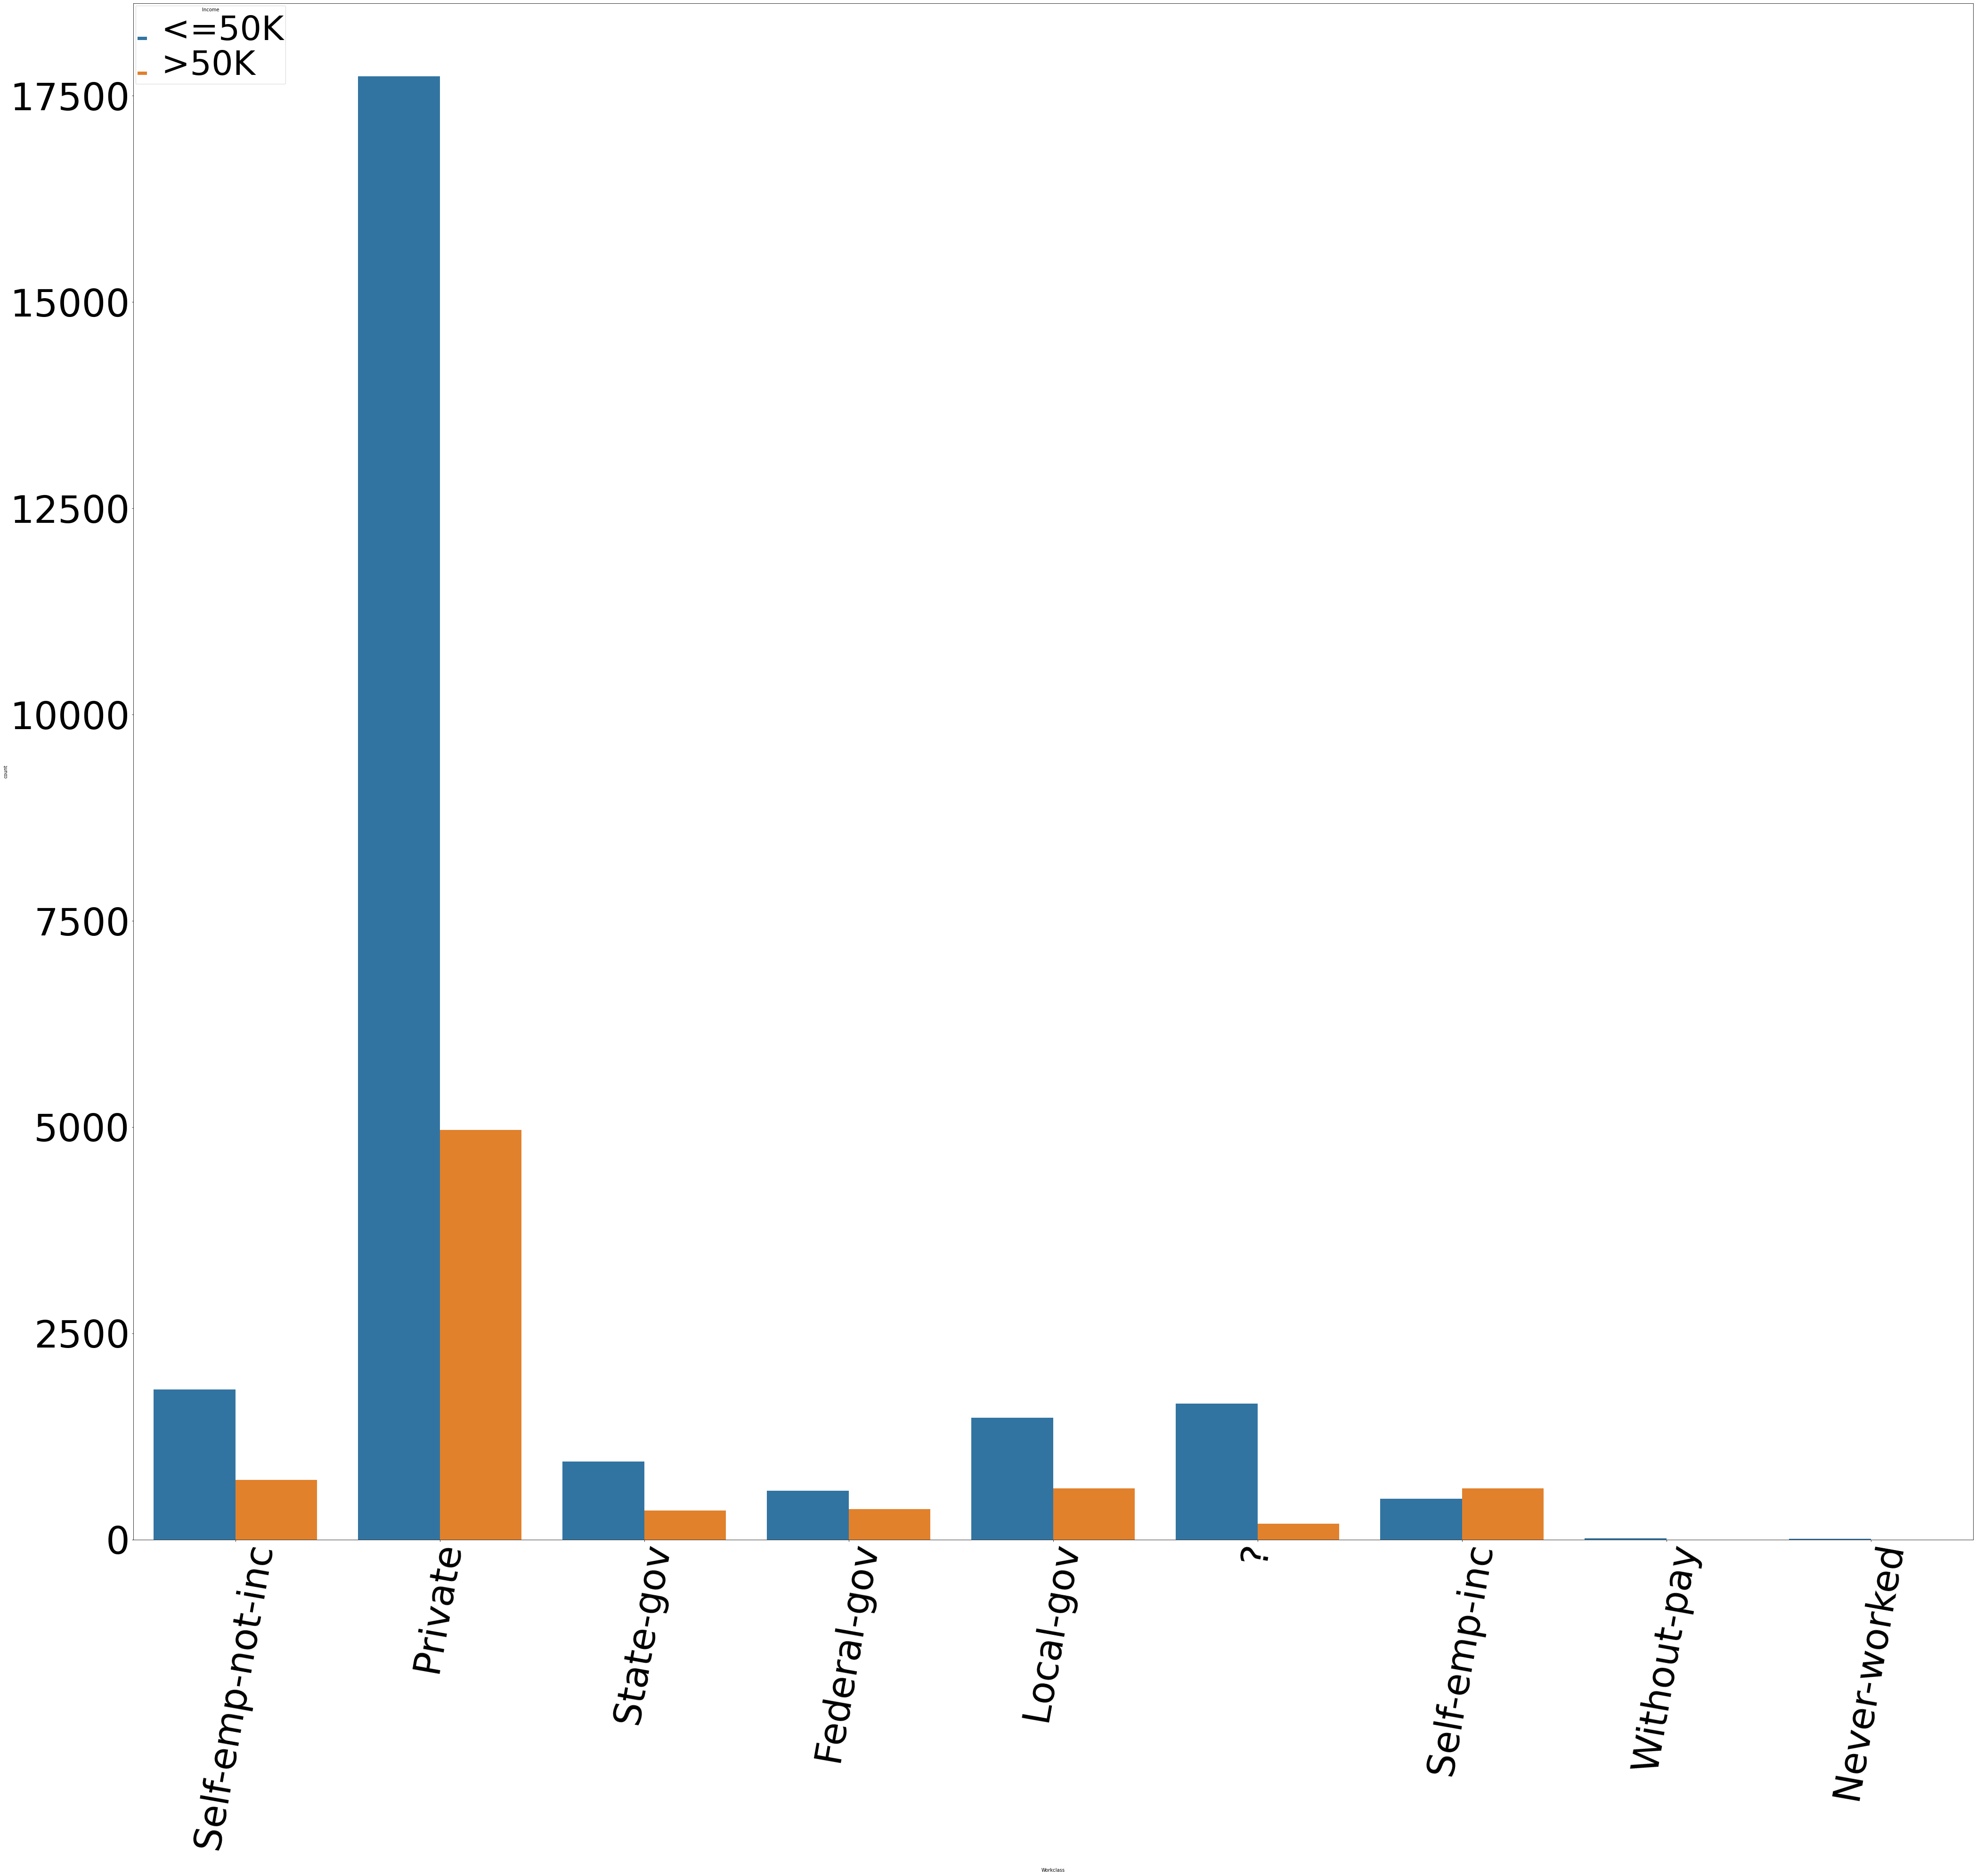

In [92]:
plt.figure(figsize=(70,60))
chart = sns.countplot(x='Workclass', hue='Income', data=data, )
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

In [93]:
#There are more people working in private sector

[Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Never-married'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse'),
 Text(0, 0, ' Widowed')]

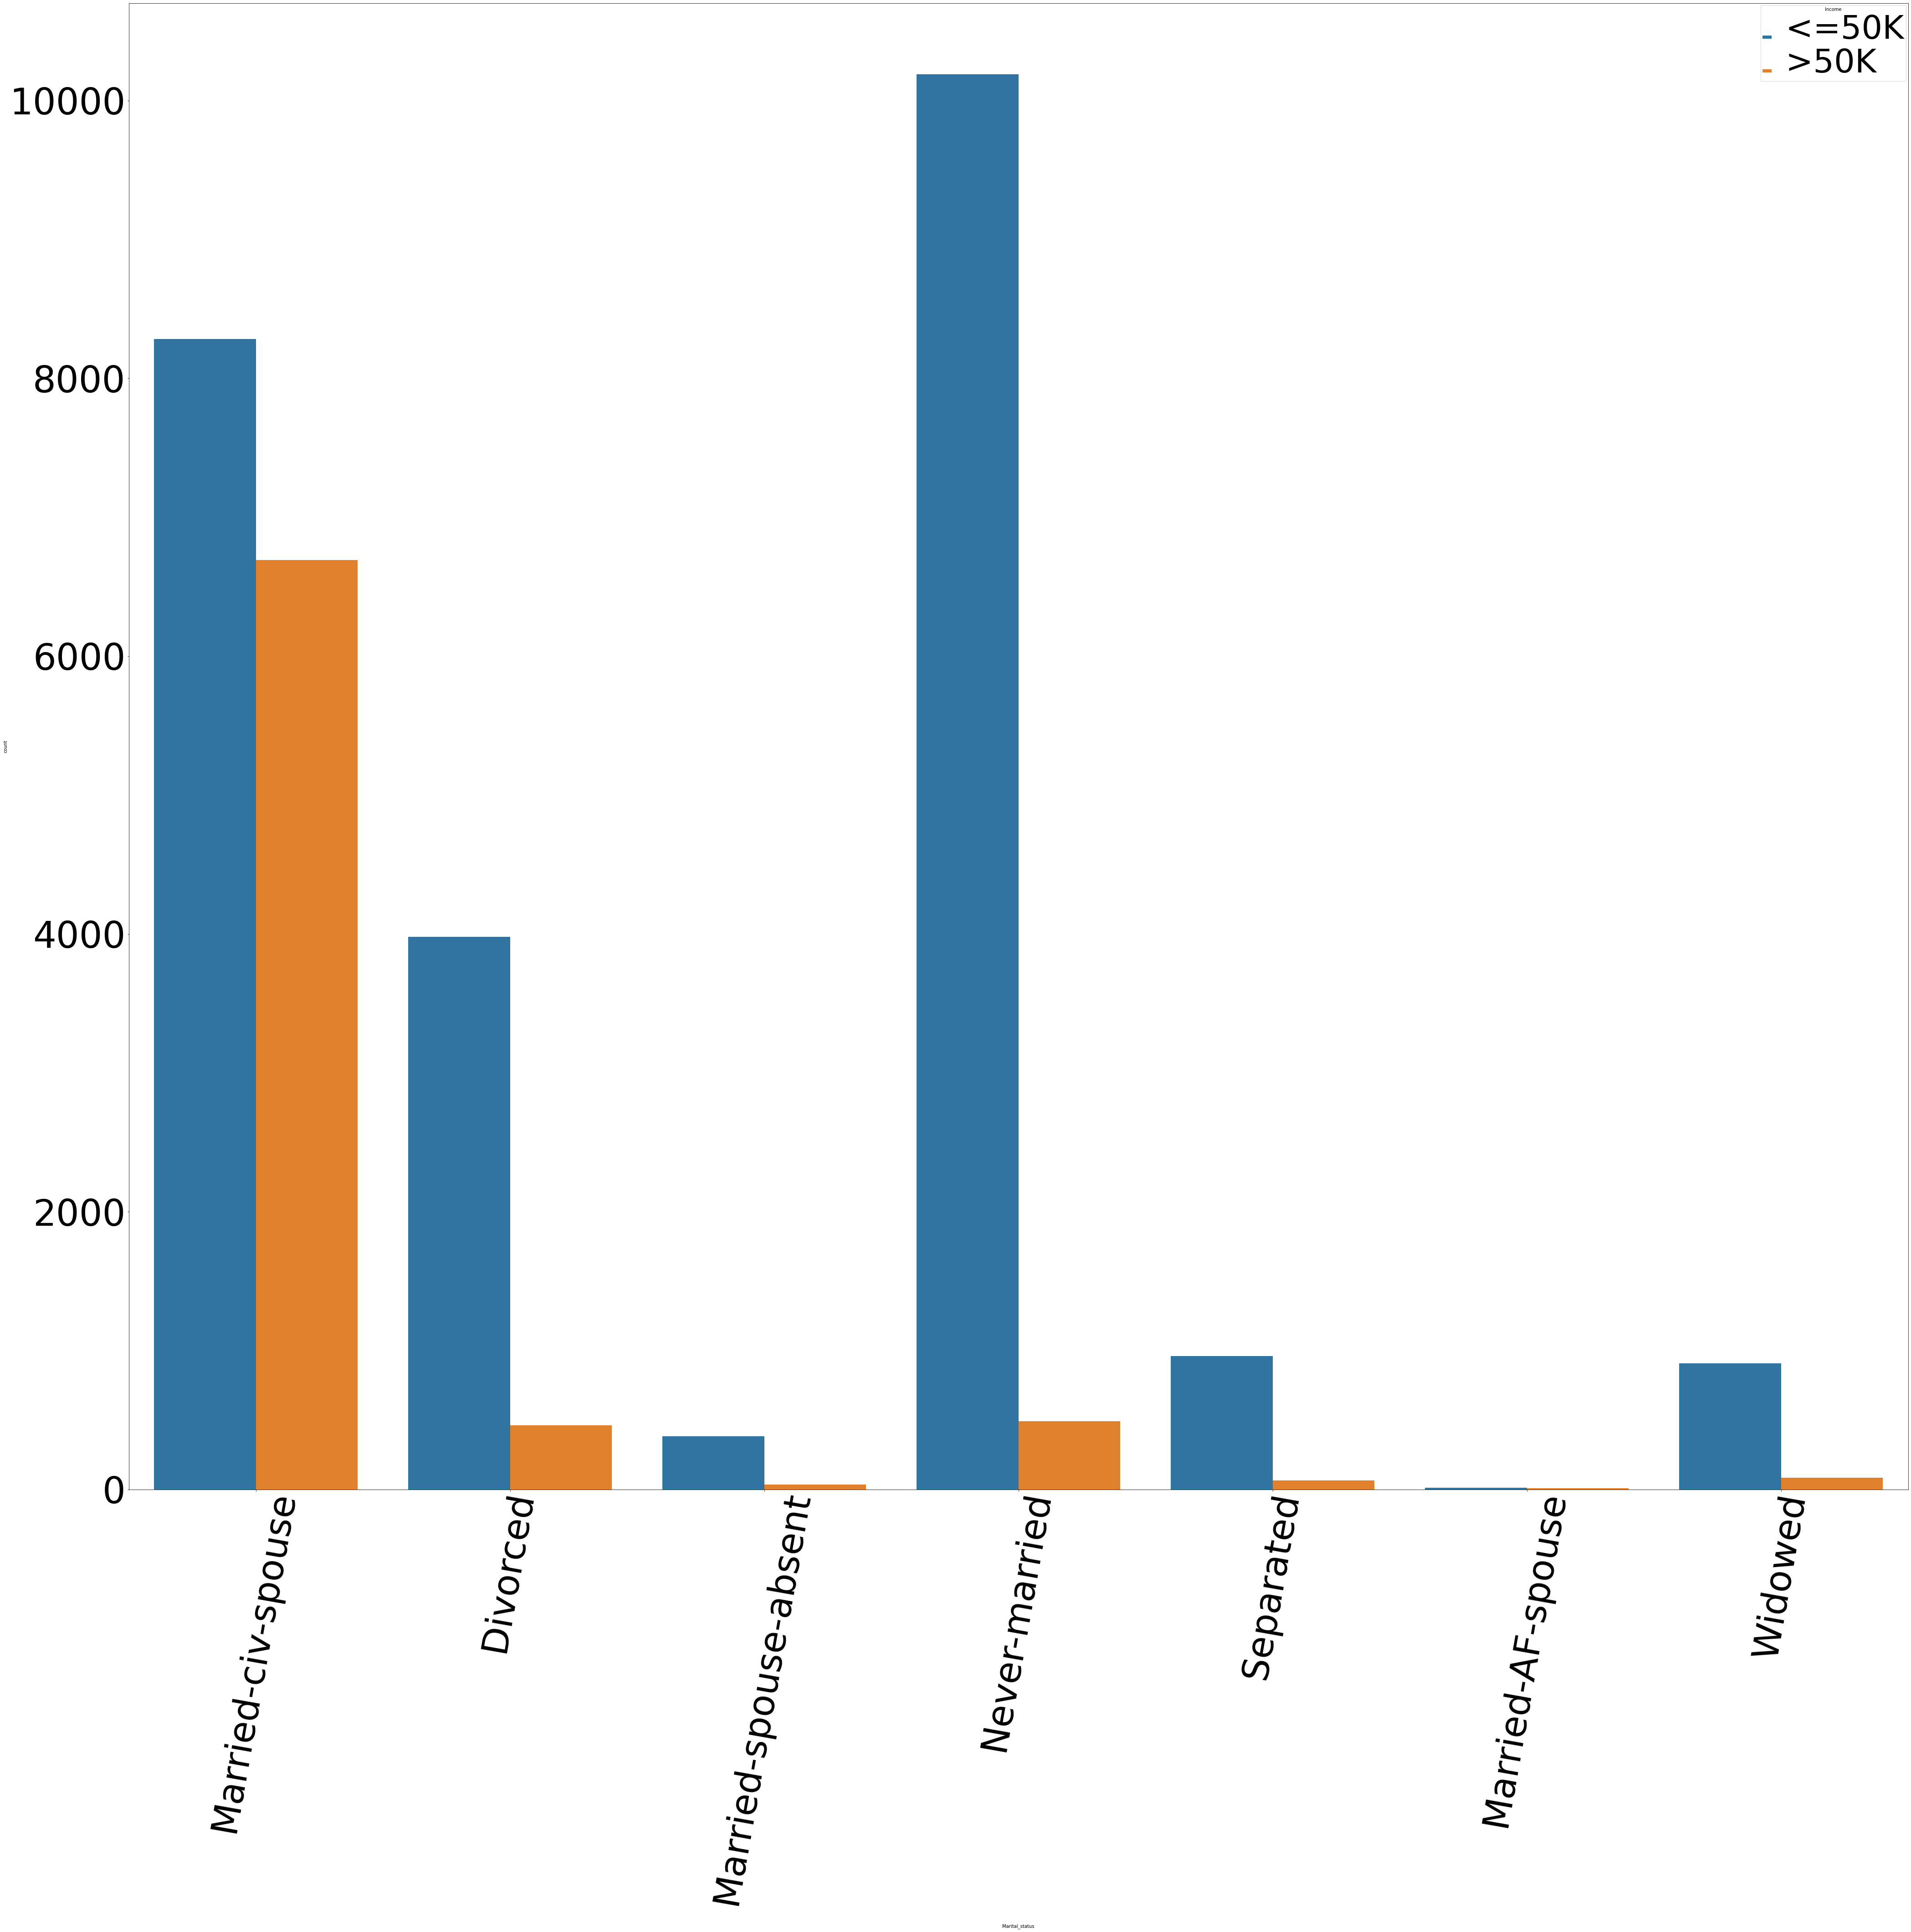

In [94]:
plt.figure(figsize=(70,60))
chart = sns.countplot(x='Marital_status', hue='Income', data=data)
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

[Text(0, 0, ' Husband'),
 Text(0, 0, ' Not-in-family'),
 Text(0, 0, ' Wife'),
 Text(0, 0, ' Own-child'),
 Text(0, 0, ' Unmarried'),
 Text(0, 0, ' Other-relative')]

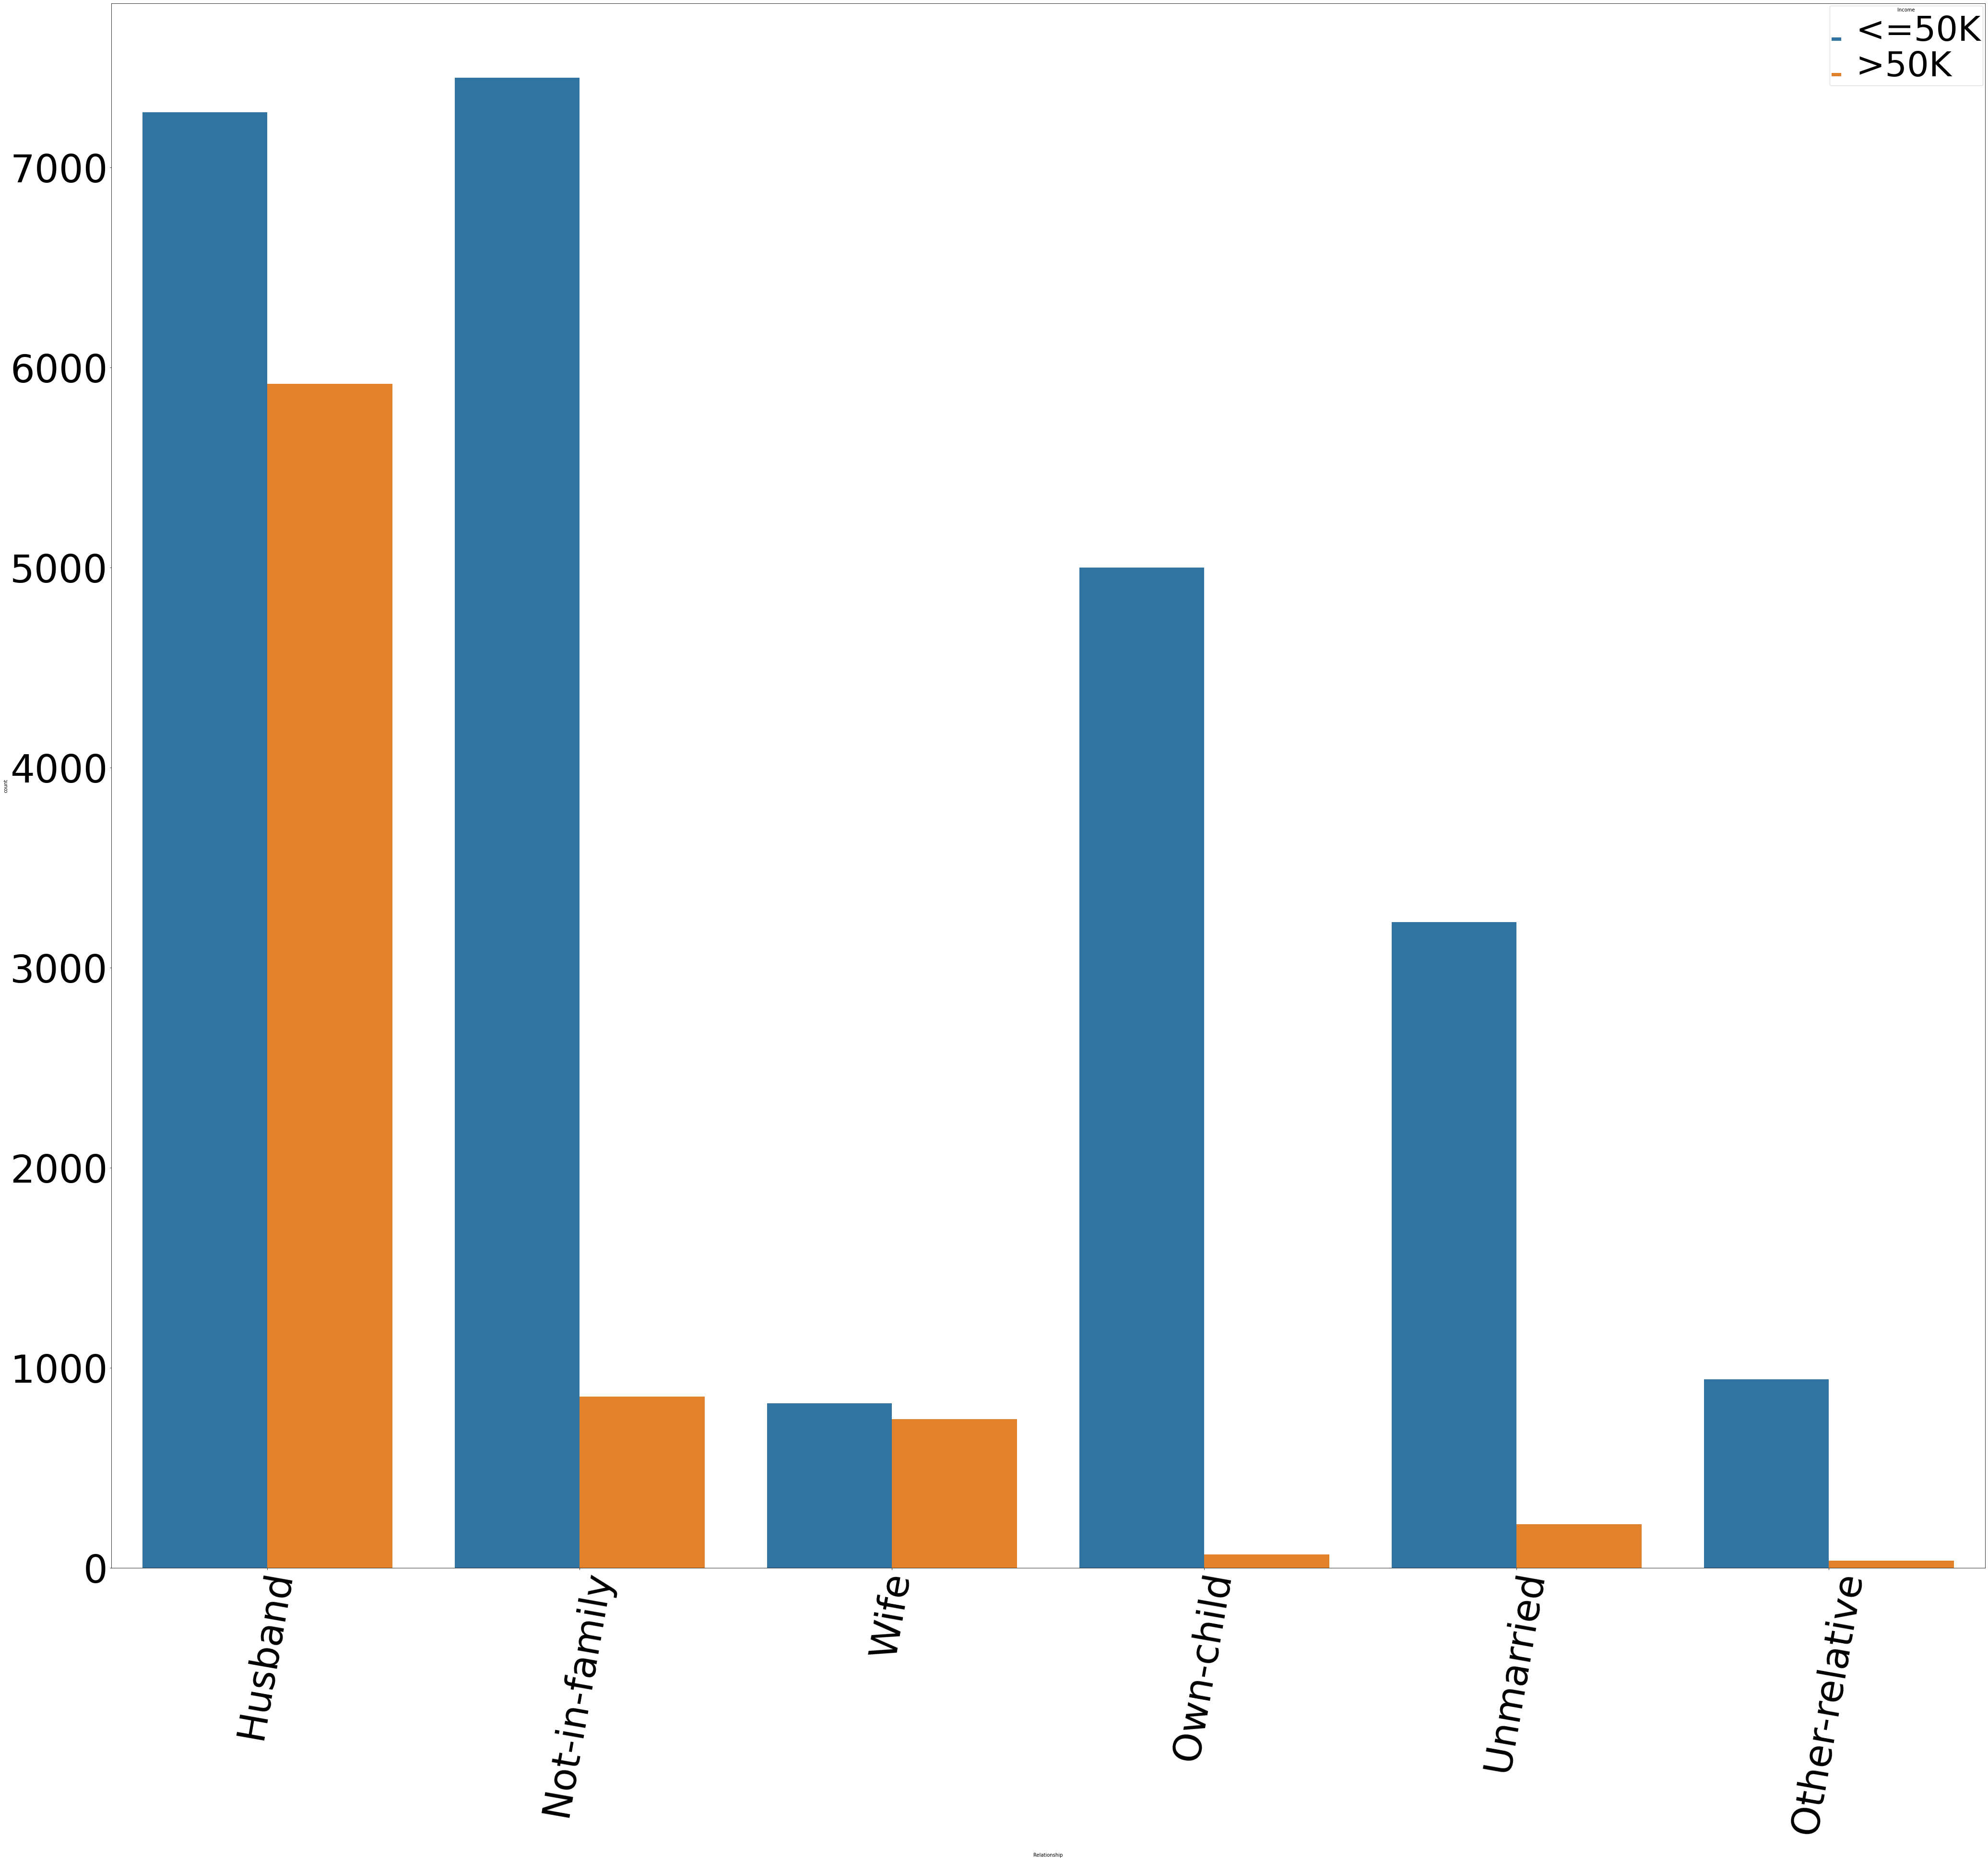

In [95]:
plt.figure(figsize=(70,60))
chart = sns.countplot(x='Relationship', hue='Income', data=data, )
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

[Text(0, 0, ' White'),
 Text(0, 0, ' Black'),
 Text(0, 0, ' Asian-Pac-Islander'),
 Text(0, 0, ' Amer-Indian-Eskimo'),
 Text(0, 0, ' Other')]

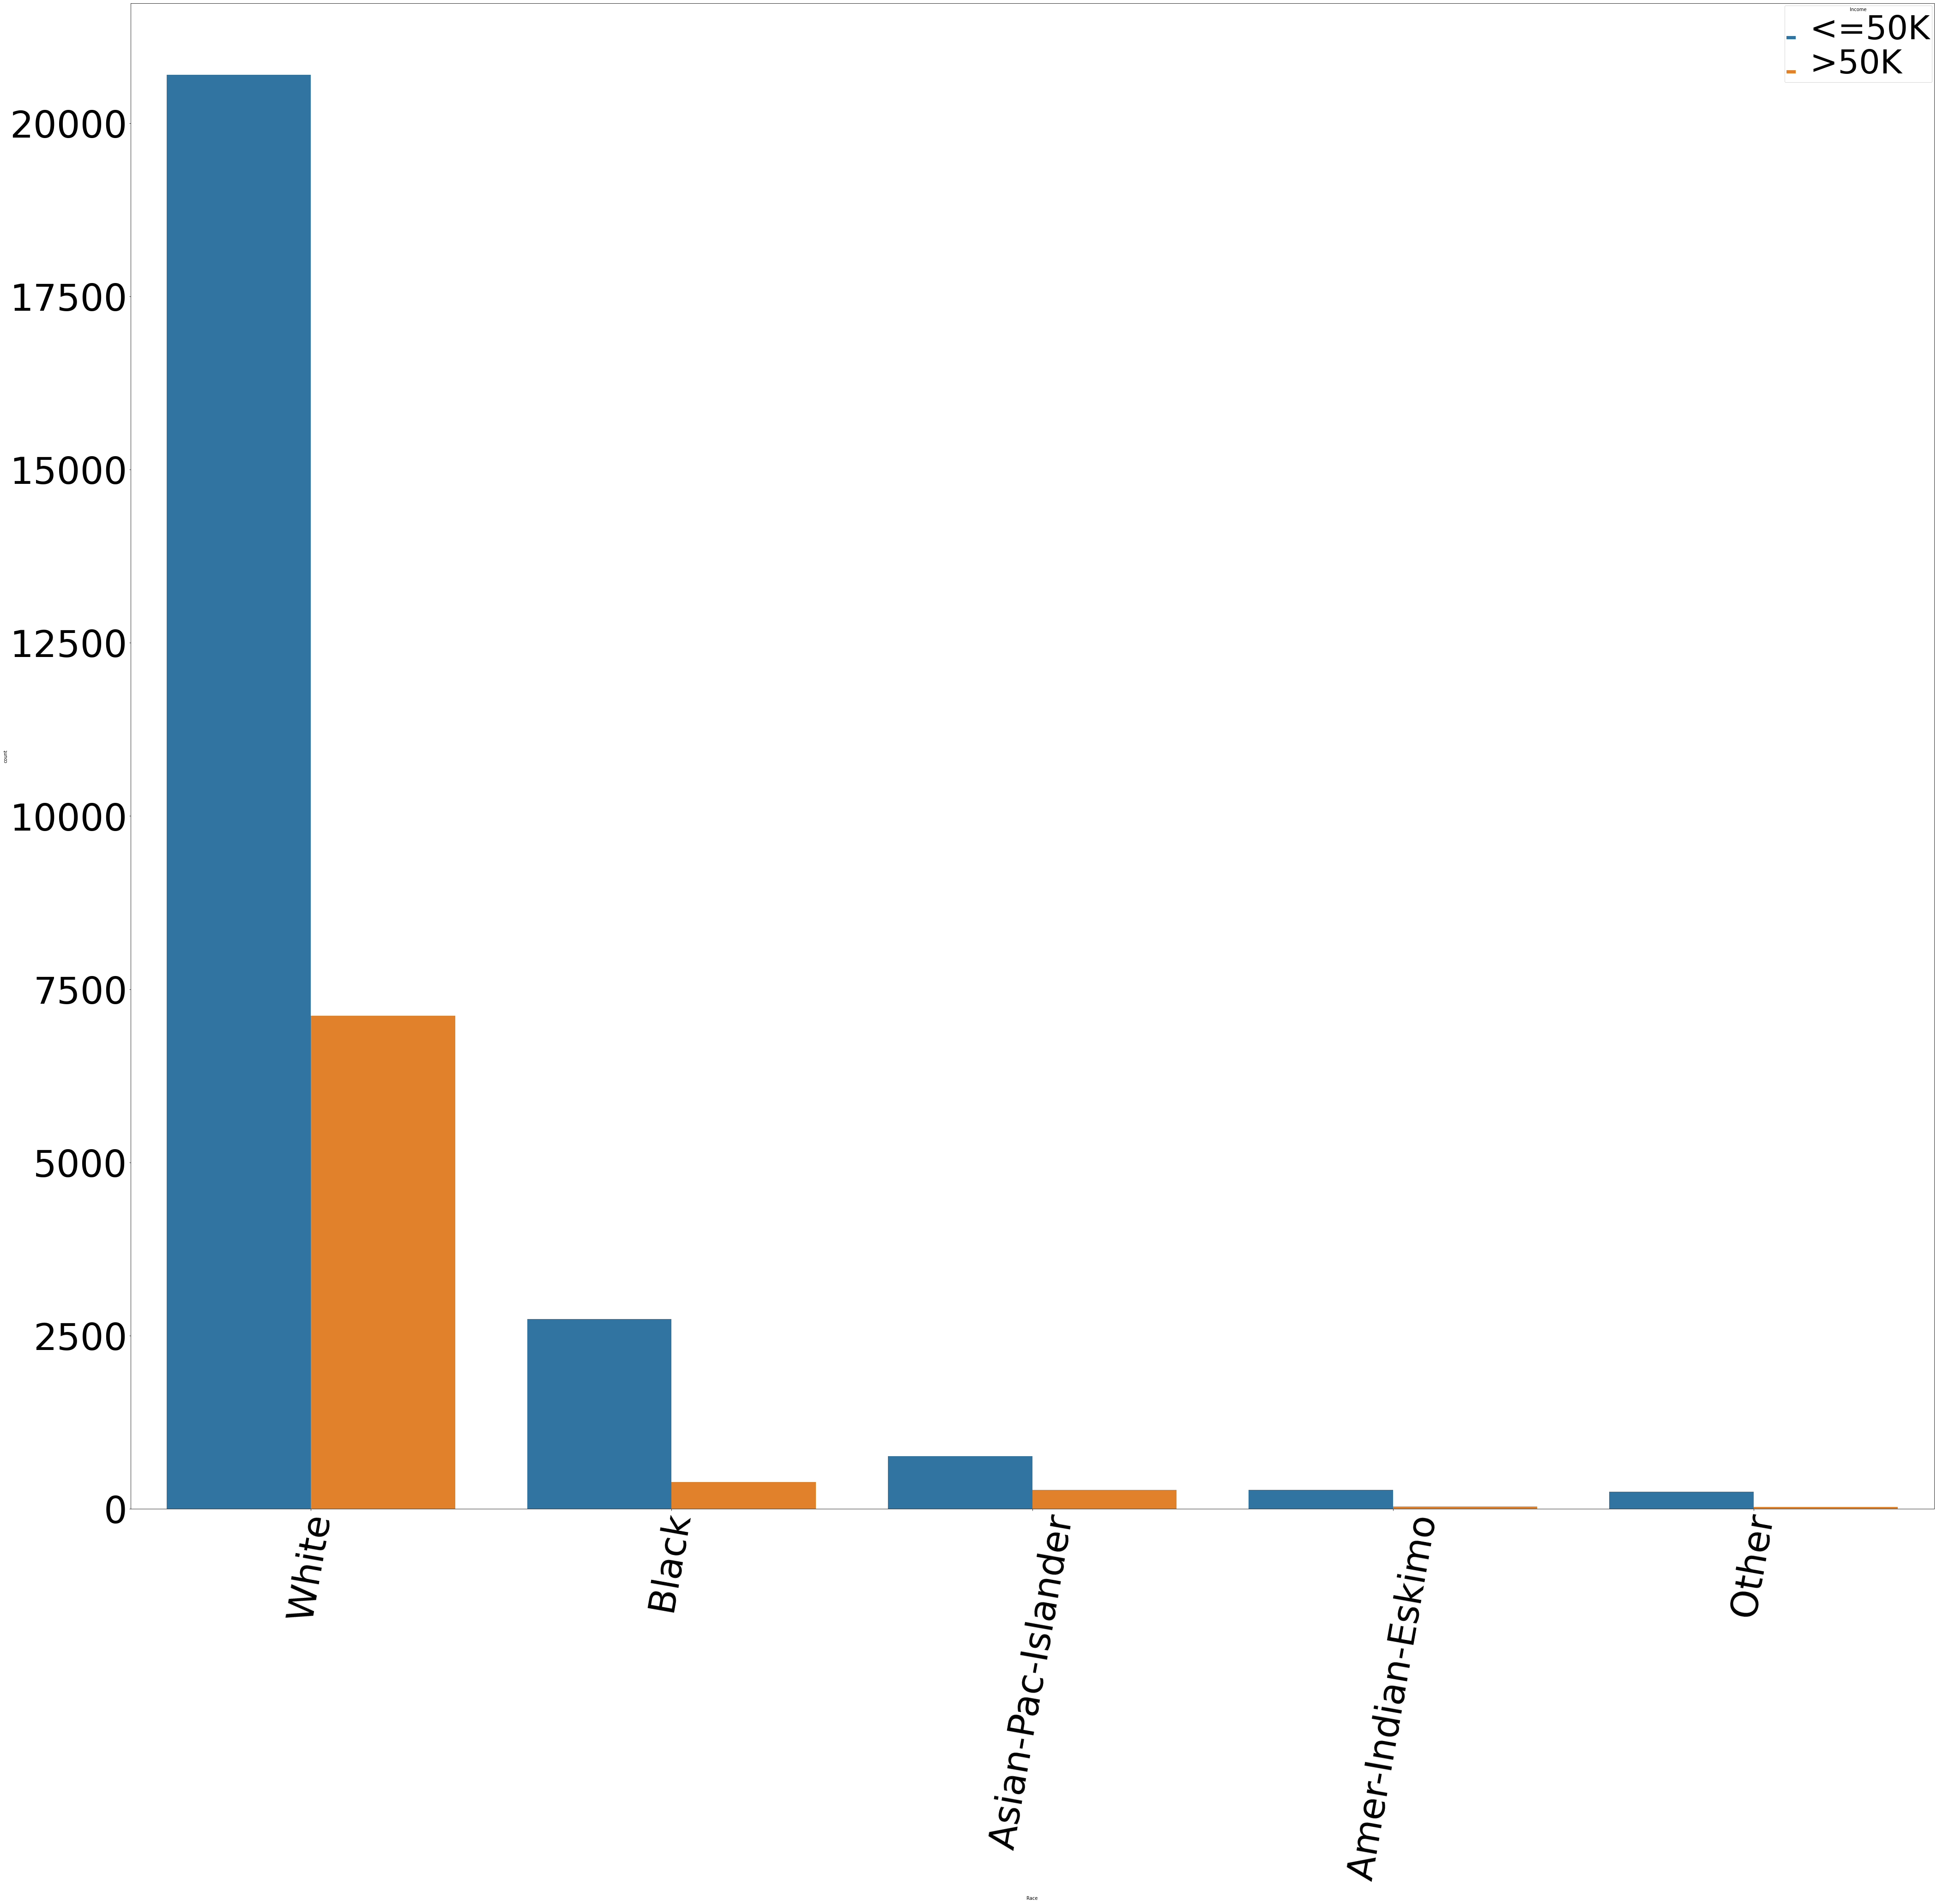

In [96]:
plt.figure(figsize=(70,60))
chart = sns.countplot(x='Race', hue='Income', data=data, )
chart.tick_params(labelsize=80)
plt.setp(chart.get_legend().get_texts(), fontsize='72')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

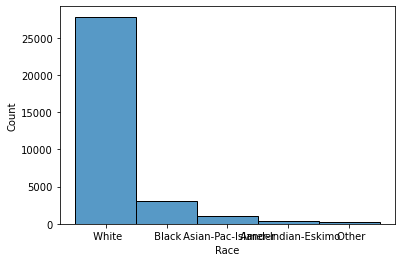

In [97]:
sns.histplot(data.Race)

In [98]:
# in our sample most of them are white

In [99]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


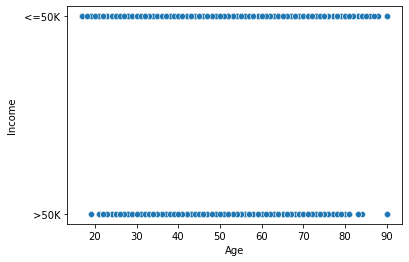

In [100]:
sns.scatterplot(data.Age, data.Income)

In [101]:
#Age is less related with income

<Figure size 5040x5040 with 0 Axes>

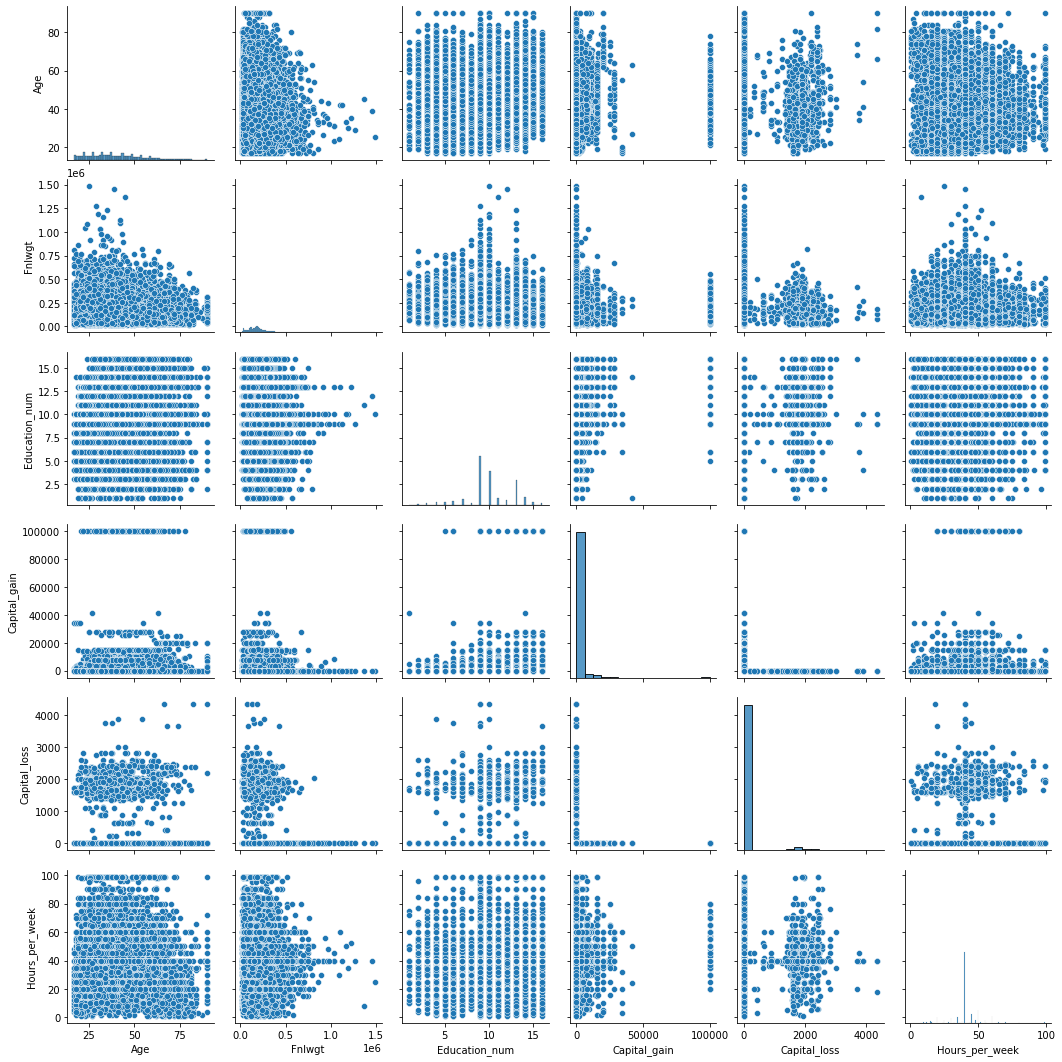

In [102]:
plt.figure(figsize=(70,70))
sns.pairplot(data)

In [103]:
cor = data.corr()

In [104]:
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


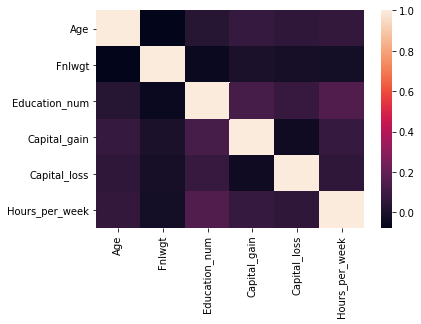

In [105]:
sns.heatmap(cor)

In [106]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [107]:
data.Workclass.nunique()

9

In [108]:
data.Education.nunique()

16

In [109]:
data.Marital_status.nunique()

7

In [110]:
data.Occupation.nunique()

15

In [111]:
data.Relationship.nunique()

6

In [112]:
data.Race.nunique()

5

In [113]:
data.Native_country.nunique()

42

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
columns = ["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Relationship",
           "Sex", "Native_country","Race", "Income"]
for i in columns:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [116]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [117]:
from scipy.stats import zscore

In [118]:
zsc = np.abs(zscore(data))

In [119]:
print(np.where(zsc > 3)[0].shape)

(5667,)


In [120]:
#since outlierrs are around 20% it is not to remove outliers since there is a large data loss

In [121]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [122]:
from sklearn.preprocessing import power_transform

In [123]:
#removing skewness
columns = ["Fnlwgt", "Workclass", "Capital_gain", "Capital_loss"]
for i in columns:
    data[i] = power_transform(np.array(data[i]).reshape(-1,1))
# data = pd.DataFrame(power_transform(data_e), columns=data.columns)

In [124]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1.644223,-1.089889,9,13,2,4,0,4,1,-0.301370,-0.221213,13,39,0
1,38,0.011864,0.398743,11,9,0,6,1,4,1,-0.301370,-0.221213,40,39,0
2,53,0.011864,0.562540,1,7,2,6,0,2,1,-0.301370,-0.221213,40,39,0
3,28,0.011864,1.340398,9,13,2,10,5,2,0,-0.301370,-0.221213,40,5,0
4,37,0.011864,0.957182,12,14,2,4,5,4,0,-0.301370,-0.221213,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.011864,0.746749,7,12,2,13,5,4,0,-0.301370,-0.221213,38,39,0
32556,40,0.011864,-0.193298,11,9,2,7,0,4,1,-0.301370,-0.221213,40,39,1
32557,58,0.011864,-0.219755,11,9,6,1,4,4,0,-0.301370,-0.221213,40,39,0
32558,22,0.011864,0.271668,11,9,4,1,3,4,1,-0.301370,-0.221213,20,39,0


In [125]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,3.256000e+04,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,3.256000e+04,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,8.942342e-16,3.712291e-16,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,6.689435e-16,1.697163e-15,40.437469,36.718796,0.240817
std,13.640642,1.000015e+00,1.000015e+00,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,1.000015e+00,1.000015e+00,12.347618,7.823892,0.427586
min,17.000000,-2.260587e+00,-2.765553e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.013699e-01,-2.212132e-01,1.000000,0.000000,0.000000
25%,28.000000,1.186427e-02,-6.146316e-01,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,-3.013699e-01,-2.212132e-01,40.000000,39.000000,0.000000
50%,37.000000,1.186427e-02,5.238486e-02,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,-3.013699e-01,-2.212132e-01,40.000000,39.000000,0.000000
75%,48.000000,1.186427e-02,5.820399e-01,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,-3.013699e-01,-2.212132e-01,45.000000,39.000000,0.000000
max,90.000000,3.527168e+00,6.040314e+00,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,3.318241e+00,4.520526e+00,99.000000,41.000000,1.000000


In [126]:
x = data.loc[:,data.columns != "Income"]

In [127]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,1.644223,-1.089889,9,13,2,4,0,4,1,-0.301370,-0.221213,13,39
1,38,0.011864,0.398743,11,9,0,6,1,4,1,-0.301370,-0.221213,40,39
2,53,0.011864,0.562540,1,7,2,6,0,2,1,-0.301370,-0.221213,40,39
3,28,0.011864,1.340398,9,13,2,10,5,2,0,-0.301370,-0.221213,40,5
4,37,0.011864,0.957182,12,14,2,4,5,4,0,-0.301370,-0.221213,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.011864,0.746749,7,12,2,13,5,4,0,-0.301370,-0.221213,38,39
32556,40,0.011864,-0.193298,11,9,2,7,0,4,1,-0.301370,-0.221213,40,39
32557,58,0.011864,-0.219755,11,9,6,1,4,4,0,-0.301370,-0.221213,40,39
32558,22,0.011864,0.271668,11,9,4,1,3,4,1,-0.301370,-0.221213,20,39


In [128]:
y = data.loc[:,"Income"]

In [129]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [130]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 109


In [131]:
#best random state is 180
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 109)

In [132]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8320770519262981, 'KNN': 0.8136515912897823, 'RandomForest': 0.8620882188721385, 'LogisticRegression': 0.8266331658291457, 'naive': 0.820072585147962}


In [133]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [134]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.8212223982009619, 'KNeighborsClassifier()': 0.8066648358057965, 'RandomForestClassifier()': 0.8532865475620232, 'LogisticRegression()': 0.8142813473167545, 'GaussianNB()': 0.8081698356617275}


In [135]:
#KNN is the best algorithm here

In [137]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [138]:
parameters = {'leaf_size': list(range(1,50)),  
              'n_neighbors': list(range(1,30)), 
              'p': [1,2]}

In [139]:
GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [140]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [141]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [142]:
accuracy_score(y_test, GCV_predict)

0.8357063093243998

In [143]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "Census.obj")

['Census.obj']